In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install openai
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine 

**신경망 구조**

Dense 층
- 모든 입력 뉴런과 출력 뉴런 사이에 연결된 완전히 연결된(fully connected) 층을 의미
- 각 입력 뉴런과 출력 뉴런 사이의 연결 가중치를 학습하고, 입력 신호에 가중치를 곱한 후 편향(bias)을 더하는 선형 변환(linear transformation)을 수행하고 이 선형 변환의 결과에 활성화 함수(activation function)를 적용하여 출력을 계산
- 예를 들어, Dense 층은 입력 벡터 [x₁, x₂, ..., xₙ]과 가중치 행렬 W, 편향 벡터 b가 주어졌을 때, 출력 벡터 [y₁, y₂, ..., yₘ]를 계산

활성화 함수(Activation function)

- 인공 신경망에서 각 뉴런의 출력을 결정하는 비선형 함수
- 활성화 함수는 입력 신호의 가중치 합과 편향을 적용한 후, 그 결과에 적용되어 다음 층으로 전달
- 인공 신경망에서 비선형성을 도입하고, 신경망의 복잡한 함수 근사(approximation) 능력을 향상시키는 것
- 인공 신경망은 여러 층의 연속된 선형 변환과 비선형 활성화 함수를 조합하여 복잡한 입력과 출력 관계를 학습
- 주요 활성화 함수
  - 시그모이드(Sigmoid) 함수:
    - 범위: 0과 1 사이
    - 주요 특징: 입력값을 확률로 해석할 수 있으며, 비선형 함수로서 미분 가능
    - 단점: 큰 입력값에 대해 그래디언트 소실 문제가 발생할 수 있음
  - 하이퍼볼릭 탄젠트(Tanh) 함수:
    - 범위: -1과 1 사이
    - 주요 특징: 시그모이드와 유사하게 비선형 함수이며, 원점을 중심으로 대칭
    - 단점: 여전히 큰 입력값에 대해 그래디언트 소실 문제가 발생할 수 있음
  - 렐루(ReLU, Rectified Linear Unit) 함수:
    - 범위: 0 이상의 입력에 대해 그대로 출력, 음수 입력에 대해 0 출력
    - 주요 특징: 계산이 간단하고 빠르며, 선형 영역으로 쉽게 학습 가능
    - 단점: 음수 입력에 대해 출력이 0이 되어 해당 뉴런이 활성화되지 않는 문제가 있음 (죽은 렐루 문제)
  - 소프트맥스(Softmax) 함수:
    - 범위: 0과 1 사이
    - 주요 특징: 다중 클래스 분류에 사용되며, 출력값을 확률 분포로 해석
    - 단점: 출력값의 합이 1이 되도록 정규화되어, 다른 출력값에 영향을 받을 수 있음

# 1장 딥러닝이란 무엇인가?
## 1.1 인공 지능과 머신 러닝, 딥러닝
### 1.1.1 인공 지능
- 보통의 사람이 수행하는 지능적인 작업을 자동화하기 위한 연구 활동
- symbolic AI - 프로그래머가 명시적인 규칙을 줌(하드코딩된 규칙)
- 규칙과 데이터 -> 전통적인 프로그래밍 -> 해답 (데이터가 적절한 해답이 되게 하는 규칙, 즉 검퓨터 프로그램을 프로그래머가 작성함
### 1.1.2 머신 러닝
- 기계가 넣어준 데이러토 학습해서 룰을 만들어 내고 -> 그것 룰대로 예측함
- 데이터와 해답 -> 머신 러닝 -> 규칙
- 머신 러닝 시스템은 명시적으로 프로그램되는 것이 아니라 훈련된다
### 1.1.3 데이터에서 표현을 학습하기
-
### 1.1.4 딥러닝에서 '딥'이란 무엇일까?
- 1~2층의 얕은 학습기로 복잡한 문제를 풀기 어려움
- 사람의 신경망을 모방(벤치마킹)하는 것에 대해서 생각하기 시작함
- layer가 깊다는 의미임(연속된 층에 대한 의미)


In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# 28 x 28 픽셀 사이즈가 60,000개 있는 것임
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
import numpy as np

np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
# unit8은 8개의 비트로 256개의 서로 다른 값을 표현
# 이미지 처리에서 많이 사용되는 데이터 형식 중 하나이며, 메모리 관리가 효율적이고 연산에도 효과적

test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### 두 가지 방식
1. 순차적인 방식 (Sequential)
- relu - 선형 변환만으로 층을 쌓으면 효과가 없다. 비선형으로 해주어야 함, 선형을 relu함수에 싣는 것??
- softmax - 다중분류, 여러 개로 분류할 때 softmax를 활성화 함수로 쓴다
2. 함수 방식



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# optimizer - 모델이 훈련하는 동안 가중치를 업데이트하는 알고리즘을 지정하는데 사용
# rmsprop - 주로 경사 하강법이 사용되며, rmsprop는 경사 하강법 알고리즘 중 하나임
# optimizer의 기준이 되는 것이 손실 함수
# sparse_categorical_crossentropy - 분류 문제에서 주로 사용되는 손실 함수 중 하나, 정수 레이블을 가진 데이터에 적합함

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [ ]:
# 훈련을 시작하기 전에 데이터를 모델에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정함
# 신경망 모델에 입력으로 사용하기 위해서는 이미지 데이터를 1차원 형태로 변환해야 함

train_images = train_images.reshape((60000, 28 * 28))    # 이미지 데이터를 1차원으로 펼치는 역할
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
# 변경 전
print(train_images[4].ndim)
train_images[4].shape

2


(28, 28)

In [ ]:
# 변경 후
print(train_images[4].ndim)
train_images[4].shape

1


(784,)

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 4ms/step - loss: 2.2353 - accuracy: 0.2544
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 1.6771 - accuracy: 0.5874
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.0531 - accuracy: 0.7457
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7534 - accuracy: 0.8087
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6073 - accuracy: 0.8396


In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 63ms/step


array([1.5836197e-04, 7.1671548e-07, 4.0090803e-05, 8.5904100e-04,
       9.3878862e-06, 8.5873500e-05, 6.7191756e-08, 9.9471670e-01,
       1.0833250e-05, 4.1189850e-03], dtype=float32)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'테스트 정확도: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3756 - accuracy: 0.8959
테스트 정확도: 0.8959000110626221


In [ ]:
import numpy as np
x = np.array(12)
print(x.ndim)
x

0


array(12)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
print(x.ndim)
x

1


array([12,  3,  6, 14,  7])

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### 다섯 번째 이미지 데이터 출력하기

### 이미지 데이터
- 3차원 이미지의 차원은 "가로 픽셀 수 x 세로 픽셀 수 x 이미지 슬라이스 수"로 표현
- 픽셀은 이미지를 구성하는 가장 작은 단위로, "picture element"의 줄임말이며 이미지를 표현하는 데 사용되는 점 또는 화소
- 흑백 이미지의 경우, 각 픽셀은 단일 색상 값을 가지며, 일반적으로 0부터 255까지의 범위로 표현. 0은 픽셀이 검은색에 가깝고, 255는 픽셀이 흰색에 가깝다.
- 컬러 이미지의 경우, 각 픽셀은 일반적으로 RGB(Red, Green, Blue) 값을 가지며 각각 빨강, 초록, 파랑의 강도를 나타내며, 0부터 255까지의 범위로 표현
- 강도의 조합에 따라 다양한 색상이 생성. 예를 들어, (255, 0, 0)은 빨간색, (0, 255, 0)은 초록색, (0, 0, 255)는 파란색
- 각 픽셀은 이미지의 위치에 따라 좌표로 식별. 가장 왼쪽 위 픽셀이 (0, 0)이며, 가로 방향으로 증가하면서 픽셀의 열 인덱스가 증가하고, 세로 방향으로 증가하면서 픽셀의 행 인덱스가 증가
- 이미지 처리 작업에서는 픽셀 단위의 조작이 중요하며, 픽셀 값을 수정하거나 분석하여 다양한 이미지 효과를 생성하거나 이미지에서 정보를 추출

# MNIST 데이터셋의 픽셀 값은 그레이스케일 값으로, 0은 흰색을 의미하고 255는 검은색을 의미
# 특정 시각화 라이브러리나 플랫폼에 따라서 0과 255의 색상 표현이 반대로 설정될 수 있으며 일부 라이브러리는 0을 검은색으로, 255를 흰색으로 표현

In [ ]:
# 28 X 28임. 픽셀당 0~255까지 표현함
train_images[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

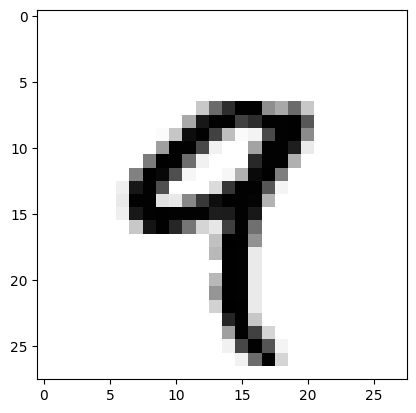

In [ ]:
# binary color map - 이진 색상 맵, 흑백 이미지를 표시하는 데 사용됨, 0과 1 사이의 값을 흑백으로 표현하며, 0은 검은색에 가까워지고 1은 흰색에 가까워짐

import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

### 넘파이로 텐서 조작하기

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### 2.3 신경망의 톱니바퀴: 텐서 연산
- relu 함수 - x가 0이하면 0이고, 0 이상이면 값이 있는 함수

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2    # x는 랭크-2 넘파이 배열임
    x = x.copy()    # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
# 덧셈

def naive_add(x, y):
    assert len(x.shape) == 2    # x와 y는 랭크-2 넘파이 배열임
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import numpy as np
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y    # 원소별 덧셈
    z = np.maximum(z, 0.)    # 원소별 렐루 함수

print('걸린 시간: {0:.2f} s'.format(time.time() - t0))

걸린 시간: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)

print('걸린 시간: {0:.2f} s'.format(time.time() - t0))

걸린 시간: 1.98 s


In [ ]:
X = np.random.random((32, 10))    # X는 크기가 (32, 10)인 랜덤한 행렬임
print(X[0:3])
y = np.random.random((10,))    # y는 크기가 (10,)인 랜덤한 벡터임
y

[[0.05698865 0.54819841 0.92382342 0.78736521 0.7383014  0.19113169
  0.38762784 0.27923044 0.21157859 0.51436755]
 [0.134745   0.48803627 0.82916625 0.17388066 0.04855074 0.46769936
  0.86321477 0.04619542 0.08795456 0.80344872]
 [0.30919316 0.75802735 0.03933133 0.34707772 0.53340593 0.41138352
  0.82593647 0.08761254 0.96104782 0.26542441]]


array([0.89628016, 0.78941156, 0.11459668, 0.15706143, 0.978315  ,
       0.43580016, 0.24311176, 0.8683732 , 0.74922749, 0.81487103])

In [ ]:
np.reshape(y, (10, 1))
y.reshape(10,1)
y = np.expand_dims(y, axis=0)
y

array([[0.89628016, 0.78941156, 0.11459668, 0.15706143, 0.978315  ,
        0.43580016, 0.24311176, 0.8683732 , 0.74922749, 0.81487103]])

In [ ]:
np.concatenate([y]*32, axis=0)[:3]

array([[0.89628016, 0.78941156, 0.11459668, 0.15706143, 0.978315  ,
        0.43580016, 0.24311176, 0.8683732 , 0.74922749, 0.81487103],
       [0.89628016, 0.78941156, 0.11459668, 0.15706143, 0.978315  ,
        0.43580016, 0.24311176, 0.8683732 , 0.74922749, 0.81487103],
       [0.89628016, 0.78941156, 0.11459668, 0.15706143, 0.978315  ,
        0.43580016, 0.24311176, 0.8683732 , 0.74922749, 0.81487103]])

### 2.3.2 브로드캐스팅

In [ ]:
import numpy as np

np.random.seed(0)
X = np.random.random((32, 10))    # X는 크기가 (32, 10)인 랜덤한 행렬임
y = np.random.random((10,))    # y는 크기가 (10,)인 랜덤한 벡터임

# 먼저 y에 비어 있는 첫 번째 축을 추가하여 크기를(1, 10)으로 만듦
y = np.expand_dims(y, axis=0)    # 이제 y의 크기는 (1,10)임

# 그런 다음 y를 이 축에 32번 반복하면 텐서 Y의 크기는 (32, 10)이 됨
Y = np.concatenate([y]*32, axis=0)    # 축 0을 따라 y를 32번 반복하여 크기가 (32, 10)인 Y를 얻음

In [ ]:
(X + Y)[:3]

array([[0.81914141, 0.84667217, 0.6581377 , 0.84648182, 0.68577295,
        1.10203468, 1.12086855, 1.58739845, 1.24718161, 0.76336847],
       [1.06205294, 0.66037772, 0.62341888, 1.22719527, 0.33315421,
        0.54326987, 0.70349973, 1.52824529, 1.0616756 , 1.2499391 ],
       [1.24894625, 0.93064136, 0.51685368, 1.08212781, 0.38039258,
        1.09606159, 0.82663462, 1.64029436, 0.80536717, 0.7945889 ]])

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2    # x는 랭크-2 넘파이 배열임, assert - 주어진 조건이 True인지 확인, False면 AssertionError 예외를 발생시킴
    assert len(y.shape) == 1    # y는 넘파이 벡터임
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
np.random.seed(0)
X = np.random.random((32, 10))    # X는 크기가 (32, 10)인 랜덤한 행렬임
y = np.random.random((10,))

naive_add_matrix_and_vector(X, y)[:3]

array([[0.81914141, 0.84667217, 0.6581377 , 0.84648182, 0.68577295,
        1.10203468, 1.12086855, 1.58739845, 1.24718161, 0.76336847],
       [1.06205294, 0.66037772, 0.62341888, 1.22719527, 0.33315421,
        0.54326987, 0.70349973, 1.52824529, 1.0616756 , 1.2499391 ],
       [1.24894625, 0.93064136, 0.51685368, 1.08212781, 0.38039258,
        1.09606159, 0.82663462, 1.64029436, 0.80536717, 0.7945889 ]])

2.3.3 텐서 곱셈

2.3.4 텐서 크기 변환

In [ ]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

print(x.shape, '\n')

x = x.reshape((6,1))
print(x, '\n')

x = x.reshape((2,3))
print(x, '\n')

# 자주 사용하는 특별한 크기 변환은 전치(transposition)임
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(3, 2) 

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]] 

[[0. 1. 2.]
 [3. 4. 5.]] 



(20, 300)

2.3.5 텐서 연산의 기하학적 해석

선형 변환, 아핀 변환을 많이 하면 층을 하나 둔 것돠 다를 바 없다.

그래서 활성화 함수를 추가적으로 둠으로써 층을 거듭해도 필터링 효과를 올리는 것이다

기하학적 변형을 하는 이유는 기계가 좀 더 잘 예측할 수 있게 하기 위하여

2.3.6 딥러닝의 기하학적 해석

2.4 신경망의 엔진: 그레이디언트 기반 최적화

모멘텀



2.4.4 도함수 연결: 역전파 알고리즘
- 역전파는 (덧셈, 렐루, 텐서 곱셈 같은) 간단한 연산의 도함수를 사용해서 이런 기초적인 연산을 조합한 보잡합 연산의 그레이디언트를 쉽게 계산하는 방법임
- 신경망은 서로 연결된 많은 텐서 연산으로 구성됨
- 연쇄 법칙 - 미분의 연쇄적인 성질을 나타내는 법칙으로, 합성 함수의 도함수(미분)를 구하는 방법을 제공함
- 역전파와 합성 함수와의 관계??


텐서플로긔 그레이디언트 테이프

#### TensorFlow를 사용하여 변수 x에 대한 식 y = 2 * x + 3의 그래디언트(기울기)를 계산하고 tape.gradient()를 사용하여 y에 대한 x의 그래디언트를 계산. 이를 통해 x의 값을 조정할 때 y가 어떻게 변화하는지를 알 수 있으며, 이는 모델의 최적화와 역전파 알고리즘에서 매우 유용.
- TensorFlow 변수 x를 생성합니다. tf.zeros((2, 2))를 사용하여 크기가 2x2이고 모든 요소가 0인 행렬로 초기화
- tf.GradientTape()를 사용하여 GradientTape 컨텍스트를 생성하고 tape를 사용하여 연산을 기록
- y = 2 * x + 3의 연산을 수행하고 결과를 변수 y에 저장. 이 때, TensorFlow의 브로드캐스팅(broadcasting) 기능을 사용하여 x의 각 요소에 2를 곱하고 3을 더함.
- tape.gradient()를 사용하여 y에 대한 x의 그래디언트를 계산. 이를 통해 y를 x에 대해 미분한 결과, 즉 y에 대한 x의 기울기를 구한다. tape.gradient()의 첫 번째 인자로는 그래디언트를 계산하고자 하는 결과값(y)을 전달하고, 두 번째 인자로는 그래디언트를 계산하고자 하는 변수(x)를 전달.
- grad_of_y_wrt_x에는 y에 대한 x의 그래디언트가 저장된다.

In [ ]:
import tensorflow as tf

x = tf.Variable(0.)    # 초깃값 0으로 스칼라 변수를 생성함
with tf.GradientTape() as tape:    # GradientTape 블록을 시작함
    y = 2 * x + 3    # 이 블록 안에서 변수에 텐서 연산을 적용함
grad_of_y_wrt_x = tape.gradient(y, x)    # tape를 사용해서 변수 x에 대한 출력 y의 그레이디언트를 계산함

In [ ]:
x = tf.Variable(tf.zeros((2,2)))    # 크기가 (2,2)고 초깃값이 모두 0인 변수를 생성
with tf.GradientTape() as tape:
    y = 2 * x + 3

grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b    # matmul은 텐서플로의 점곱 함수임
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])    # grad_of_y_wrt_and_b는 2개의 텐서를 담은 리스트임, 각 텐서는 W, b와 크기가 같음

In [ ]:
# 가중치 행렬임

grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.4641074, 0.4641074],
        [1.291969 , 1.291969 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

2.5 첫 번째 예제 다시 살펴보기

#### 옵티마이저
- 모델의 학습 과정을 통제하고, 모델의 성능을 개선하는 역할
- 손실 함수 (또는 비용 함수)를 최소화하는 파라미터를 찾는 과정이며, 이 과정은 최적화 (Optimization)라고 함
- 옵티마이저
  - 확률적 경사 하강법 (SGD): 가장 기본적인 옵티마이저로, 각 훈련 단계에서 하나의 데이터 포인트 (또는 작은 배치)에 대한 그래디언트를 계산하여 모델 파라미터를 업데이트
  - 모멘텀: 경사 하강법에 '관성' 개념을 추가하여, 최적화 과정이 수렴을 가속화하고 지역 최솟값에서 벗어나는 데 도움
  - AdaGrad: 학습률이 각 파라미터에 따라 다르게 적용되는 적응형 학습률을 사용합니다. 이는 자주 등장하지 않는 피처에 높은 학습률을 할당하는 데 도움
  - RMSProp: AdaGrad의 문제점인 학습률이 너무 빨리 감소하는 문제를 해결한 방법
  - Adam (Adaptive Moment Estimation): 모멘텀과 RMSProp의 아이디어를 결합한 옵티마이저로, 적응형 학습률과 관성 개념을 모두 사용

#### 손실 함수 (Loss Function)
- 머신러닝 모델의 예측 출력이 실제 값과 얼마나 잘 일치하는지를 측정하는 방법
- 실 함수는 모델의 성능을 수치화하며, 이를 통해 모델의 파라미터를 최적화하는 데 사용
- 유형
  - 평균 제곱 오차 (Mean Squared Error, MSE): 회귀 문제에서 가장 일반적으로 사용되는 손실 함수. 실제 값과 모델의 예측 값 사이의 차이를 제곱한 값의 평균을 계산
  - 크로스 엔트로피 (Cross-Entropy): 분류 문제에서 일반적으로 사용되는 손실 함수. 모델의 예측 확률 분포와 실제 값의 분포 사이의 차이를 측정
  - sparse_categorical_crossentropy는 크로스 엔트로피 손실 함수의 한 형태로, 다중 클래스 분류 문제에서 주로 사용
  - 힌지 손실 (Hinge Loss): 서포트 벡터 머신 (SVM)과 같은 알고리즘에서 사용
  - 로그 손실 (Log Loss): 이진 분류 문제에서 사용되며, 예측 확률을 직접적으로 반영

dense - 빽빽한 (=fully connected or fully connected layer)

뉴런은 가중치(Weight)와 편향(Bias)을 가지고

가중치 텐서 - 인공 신경망에서 각 연결의 가중치를 저장하는 다차원 배열

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

 (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 훈련을 시작하기 전에 데이터를 모델에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정함
# 신경망 모델에 입력으로 사용하기 위해서는 이미지 데이터를 1차원 형태로 변환해야 함
train_images = train_images.reshape((60000, 28 * 28))    # 이미지 데이터를 1차원으로 펼치는 역할
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 모델
# sequential
# 연속적인 (딥러닝에서 입력 데이터를 받아 처리하고 출력을 다음 층으로 전달함,
# 이렇게 순서대로 연결된 층들은 데이터가 입력에서 출력 방향으로 흐르는 구조를 가지며, 이러한 구조에서 이 용어가 사용됨)
# 2개의 Dense 층이 연결되어 있고 각 층은 가중치 텐서를 포함하여 입력 데이터에 대한 몇 개의 간단한 텐서 연산을 적용함,
# 층의 속성인 가중치 텐서는 모델이 정보를 저장하는 곳임
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 모델을 컴파일하는 단계
# optimizer - 모델이 훈련하는 동안 가중치를 업데이트하는 알고리즘을 지정하는데 사용
# rmsprop - 주로 경사 하강법이 사용되며, rmsprop는 경사 하강법 알고리즘 중 하나임
# optimizer의 기준이 되는 것이 손실 함수

# sparse_categorical_crossentropy
# 희소 범주형 크로스 엔트로피
# 분류 문제에서 주로 사용되는 손실 함수 중 하나,
# 가중치 텐서를 학습하기 위한 피드백 신호로 사용되며 훈련하는 동안 최소화됨, 미니 배치 확률적 경사 하강법을 통해 손실이 감소됨
# 경사 하강법을 적용하는 구체적인 방식은 첫 번째 매개변수로 전달된 rmsprop 옵티마이저에 의해 결정됨
# 정수 레이블을 가진 데이터에 적합함

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# 마지막으로 훈련 반복
# 모델이 128개의 샘플의 미니 배치로 훈련 데이터를 다섯 번 반복함(전체 훈현 데이터에 수행되는 각 반복을 에포크라고 함),
# (미적분의 연쇄 법칙에서 파생된 역전파 알고리즘을 사용하여) 각 배치에서 모델이 가중치에 대한 손실의 그레이디언트를 계산함
# 그다음 배치에서 손실 값을 감소시키는 방향으로 가중치를 이동시킴
# 에포크마다 469번의 업데이트, 다섯 번의 에포크 동안 모델은 2,345번의 그레이디언트 업데이트를 수행함
# 훈련 데이터셋 60,000 = 128 * 469
# batch - 전체 데이터셋을 작은 일부 그룹으로 나누는 것을 의미함, 일반적으로 딥러닝 모델은 한 번에 모든 데이터를 처리하지 않고,
# 작은 배치로 나누어서 처리함 (메모리 효율성, 계산 속도-병렬처리, 일반화 성능-데이터의 다양성)
model.fit(train_images, train_labels, epochs=5, batch_size=128)

2.5.1 텐서플로를 사용하여 첫 번째 예제를 밑바닥부터 다시 구현하기

dot, matmul - 둘 다 행렬의 곱셈 연산을 수행하는 함수, 차이는 있음

matmul과 dot은 둘 다 행렬의 곱셈 연산을 수행하는 함수입니다. 그러나 두 함수에는 약간의 차이가 있습니다.

matmul: 행렬의 곱셈 연산을 수행합니다. tf.matmul(a, b)는 a와 b의 행렬 곱을 계산합니다. a와 b는 2D 이상의 텐서일 수 있으며, 행렬의 크기에 맞는 곱셈을 수행합니다. 예를 들어, a의 shape이 (m, n)이고 b의 shape이 (n, p)이면, 결과는 shape이 (m, p)인 행렬이 됩니다.

dot: 행렬의 곱셈 연산을 수행합니다. tf.tensordot(a, b, axes)는 a와 b의 텐서 곱을 계산합니다. axes 인수를 통해 곱셈이 수행될 축을 지정할 수 있습니다. 만약 axes를 지정하지 않으면, a와 b의 마지막 축에서의 내적을 수행합니다.

따라서 output = activation(dot(W, input) + b)는 입력 input과 가중치 W의 내적을 계산하고, 편향 b를 더한 후, 활성화 함수인 activation을 적용하는 연산을 수행합니다. 이때, dot 함수는 matmul과 유사한 역할을 수행하며, 마지막 축에서의 내적을 계산합니다.

#### 가중치 vs 그래디언트
가중치는 신경망의 출력을 결정하는 파라미터이며, 그래디언트는 이러한 가중치를 어떻게 조정할지를 결정하는 방향성을 제공하는 지표
- 가중치는 각 입력 특성이 출력에 미치는 영향의 정도를 나타냅니다. 가중치는 학습 과정에서 최적화되며, 초기에는 일반적으로 임의의 값으로 설정되고, 학습 데이터를 통해 그래디언트를 계산하고 가중치를 업데이트함으로써 점진적으로 개선
- 그래디언트(Gradient): 그래디언트는 가중치가 변할 때 손실 함수가 어떻게 변하는지를 나타내는 지표. 그래디언트는 손실 함수의 편미분으로 계산되며, 이는 각 가중치에 대한 손실의 변화율을 나타낸다. 그래디언트는 가중치를 어떻게 업데이트할지를 결정하는데 사용되며, 손실을 줄이는 방향으로 가중치를 조정하는데 도움이 되며 그래디언트가 0인 경우, 해당 가중치는 손실에 미치는 영향이 없거나, 손실을 최소화하는 최적의 값에 도달했음을 의미

In [ ]:
import tensorflow as tf



# 단순한 Dense 클래스
# activation은 각 원소에 적용되는 함수(일반적으로 relu이지만 마지막 층에는 softmax를 사용함)
# 2개의 텐서플로 변수 W와 b를 만들고 __call__() 메서드에서 앞서 언급한 변환을 적용
output = activation(dot(W, input) + b)

class NaiveDense:    # 간단한 기본적인 Dense 층 구현하는 사용자 함수를 의미함
    def __init__(self, input_size, output_size, activation):
        self.activation =activation

        w_shape = (input_size, output_size)    # 랜덤한 값으로 초기화된(input_size, output_size) 크기의 행렬 W를 만듦
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W - tf.Variable(w_initial_value)

        b_shape = (output_size,)    # 0으로 초기화된(output_size) 크기의 벡터 b를 만듦
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):    # 입력 데이터를 받아 정방향 패스를 수행하여 변환을 해주는 역할, 정방향 패스를 수행함
        return self.activation(tf.matmul(inputs, self.W) + self.b)    # 계산 결과에 self.activation 함수를 적용하여 변환된 값을 반환함

    @property    # 클래스 내에서 메서드를 속성(property)으로 정의하는 파이썬 데코레이터임
    def weights(self):    # 층의 가중치를 추출하기 위한 메서드, weights 메서드를 속성으로 정의함으로써, 해당 속성에 접근하는 것처럼 호출할 수 있게 됨
        return [self.W, self.b]

# 단순한 Sequential 클래스


59904